In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original UV and red/IR images in color
uv_image_color = cv2.imread("/Users/mohamedbasuony/Desktop/Hoku images/365_UV.tif")
red_ir_image_color = cv2.imread("/Users/mohamedbasuony/Desktop/Hoku images/730_IR.tif")

if uv_image_color is None:
    raise ValueError("UV image could not be loaded.")
if red_ir_image_color is None:
    raise ValueError("Red/IR image could not be loaded.")

# Resize images to the same dimensions (resize to the smaller dimensions)
height = min(uv_image_color.shape[0], red_ir_image_color.shape[0])
width = min(uv_image_color.shape[1], red_ir_image_color.shape[1])

uv_image_color = cv2.resize(uv_image_color, (width, height))
red_ir_image_color = cv2.resize(red_ir_image_color, (width, height))

# Extract the blue channel from the UV image and the red channel from the red/IR image
blue_channel = uv_image_color[:, :, 0]
red_channel = red_ir_image_color[:, :, 2]

# Create a pseudocolor image by combining the extracted channels
pseudocolor_image = np.zeros((height, width, 3), dtype=np.uint8)
pseudocolor_image[:, :, 0] = blue_channel  # Blue channel
pseudocolor_image[:, :, 2] = red_channel   # Red channel

# Display original and pseudocolor images using matplotlib
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(uv_image_color, cv2.COLOR_BGR2RGB))
plt.title('UV Image (Original)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(red_ir_image_color, cv2.COLOR_BGR2RGB))
plt.title('Red/IR Image (Original)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(pseudocolor_image)
plt.title('Pseudocolor Image')
plt.axis('off')

plt.show()


In [ ]:
# Sharpie image effect

def sharpie_effect(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at {image_path} could not be loaded.")
    
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    
    edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)
    
    dilated_edges = cv2.dilate(edges, kernel=np.ones((3, 3), np.uint8), iterations=1)
    
    _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY_INV)
    
    color_edges = cv2.cvtColor(dilated_edges, cv2.COLOR_GRAY2BGR)
    
    sharpie_image = cv2.addWeighted(image, 0.7, color_edges, 0.3, 0)
    
    return sharpie_image

image_path = "/Users/mohamedbasuony/Desktop/Hoku images/UV.jpg"

sharpie_image = sharpie_effect(image_path)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(sharpie_image, cv2.COLOR_BGR2RGB))
plt.title('Sharpie Image Effect')
plt.axis('off')
plt.show()



In [ ]:
#Raising an image to a negative or positive power

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageEnhance, Image

# def raise_image_to_negative_power(image_path, brightness_factor):


# Usage:
# adjust_brightness('path_to_your_image.jpg', -0.5)


def raise_image_to_power(image_path, power):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at {image_path} could not be loaded.")

    image_float = image.astype(np.float32) / 255.0

    image_power = np.power(image_float, power)

    image_power = np.clip(image_power * 255, 0, 255).astype(np.uint8)

    return image_power

image_path = "/Users/mohamedbasuony/Desktop/Hoku images/OG.jpg"

# Testing a positive power
power = 0.5
image_power = raise_image_to_power(image_path, power)

original_image = cv2.imread(image_path)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_power, cv2.COLOR_BGR2RGB))
plt.title(f'Image Raised to Power {power}')
plt.axis('off')

plt.show()

# Testing a negative power 
# power = -1
# image_negative_power = raise_image_to_negative_power(image_path, power)

# original_image = cv2.imread(image_path)

# plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
# plt.title('Original Image')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(cv2.cvtColor(image_negative_power, cv2.COLOR_BGR2RGB))
# plt.title(f'Image Raised to Power {power}')
# plt.axis('off')

# plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def partial_inversion(image, alpha):
    # Invert the image using bitwise NOT
    inverted_image = cv2.bitwise_not(image)
    
    # Blend the original and inverted images
    output_image = cv2.addWeighted(image, 1 - alpha, inverted_image, alpha, 0)
    
    return output_image

# Load the image in grayscale
image = cv2.imread('/Users/mohamedbasuony/Desktop/Hoku images/OG.jpg', cv2.IMREAD_GRAYSCALE)

# Define the inversion coefficient (0 to 1)
alpha = 0.6  # Example coefficient

# Apply partial inversion
output_image = partial_inversion(image, alpha)

# Display the original and the partially inverted image using Matplotlib
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Partially Inverted Image
plt.subplot(1, 2, 2)
plt.title(f'negative power image(alpha={alpha})')
plt.imshow(output_image, cmap='gray')
plt.axis('off')

plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def flip_and_rotate_image(image):
    # Flip the image vertically
    flipped_image_vertically = cv2.flip(image, 0)  # Vertical flip
    
    # Rotate the image 90 degrees clockwise
    rotated_image_clockwise = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    
    # Rotate the image 90 degrees counterclockwise
    rotated_image_counterclockwise = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    
    return flipped_image_vertically, rotated_image_clockwise, rotated_image_counterclockwise

image_path = "/Users/mohamedbasuony/Desktop/Hoku images/OG.jpg"

original_image = cv2.imread(image_path)
if original_image is None:
    raise ValueError(f"Image at {image_path} could not be loaded.")

flipped_image_vertically, rotated_image_clockwise, rotated_image_counterclockwise = flip_and_rotate_image(original_image)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(flipped_image_vertically, cv2.COLOR_BGR2RGB))
plt.title('Vertically Flipped Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(rotated_image_clockwise, cv2.COLOR_BGR2RGB))
plt.title('Rotated 90° Clockwise')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(rotated_image_counterclockwise, cv2.COLOR_BGR2RGB))
plt.title('Rotated 90° Counterclockwise')
plt.axis('off')

plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def blur_and_divide(image, blur_value):
    # Apply Gaussian blur to the image
    blurred_image = cv2.GaussianBlur(image, (blur_value, blur_value), 0)
    
    # Convert the images to float32 for precision during division
    original_float = image.astype(np.float32)
    blurred_float = blurred_image.astype(np.float32)
    
    # Avoid division by zero by adding a small epsilon to the blurred image
    epsilon = 1e-10
    blurred_float = np.clip(blurred_float, epsilon, None)
    
    # Divide the original image by the blurred image
    divided_image = original_float / blurred_float
    
    # Normalize the resulting image to the range [0, 255]
    divided_image_normalized = cv2.normalize(divided_image, None, 0, 255, cv2.NORM_MINMAX)
    
    # Convert back to uint8
    divided_image_uint8 = divided_image_normalized.astype(np.uint8)
    
    # Apply histogram equalization to enhance contrast
    if len(divided_image_uint8.shape) == 2:  # Grayscale image
        equalized_image = cv2.equalizeHist(divided_image_uint8)
    else:  # Color image
        equalized_image = cv2.cvtColor(divided_image_uint8, cv2.COLOR_BGR2YCrCb)
        channels = cv2.split(equalized_image)
        cv2.equalizeHist(channels[0], channels[0])
        equalized_image = cv2.merge(channels)
        equalized_image = cv2.cvtColor(equalized_image, cv2.COLOR_YCrCb2BGR)
    
    return blurred_image, divided_image_uint8, equalized_image

# Path to the image
image_path = "/Users/mohamedbasuony/Desktop/Hoku images/OG.jpg"

# Load the image
original_image = cv2.imread(image_path)
if original_image is None:
    raise ValueError(f"Image at {image_path} could not be loaded.")

# Apply the blur and divide effect
blur_value = 15  # You can adjust the blur value as needed
blurred_image, divided_image, equalized_image = blur_and_divide(original_image, blur_value)

# Display the original, blurred, and divided images
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title(f'Blurred Image (Blur value: {blur_value})')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(divided_image, cv2.COLOR_BGR2RGB))
plt.title('Divided Image (Original / Blurred)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title('Equalized Divided Image')
plt.axis('off')

plt.show()


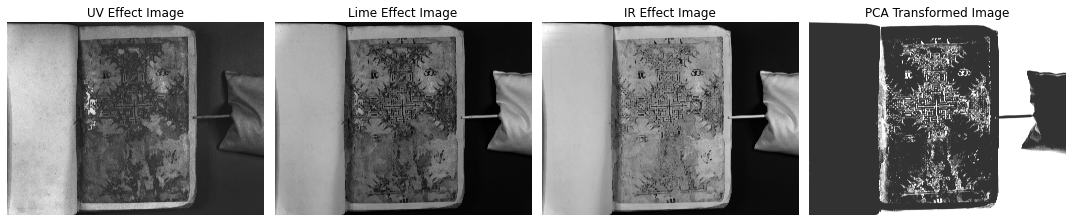

In [12]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the three images with effects
image_uv = cv2.imread("/Users/mohamedbasuony/Desktop/Hoku images/365_UV.tif")
image_lime = cv2.imread("/Users/mohamedbasuony/Desktop/Hoku images/550_Lime.tif")
image_ir = cv2.imread("/Users/mohamedbasuony/Desktop/Hoku images/730_IR.tif")

# Define the effects colors
effects = {'UV': [0, 0, 255], 'Lime': [0, 255, 0], 'IR': [255, 0, 0]}

# Initialize an array for the combined image (assuming all images have the same size)
combined_image = np.zeros_like(image_uv)

# Apply effects and combine images
for effect, color in effects.items():
    if effect == 'UV':
        image_effect = cv2.addWeighted(image_uv, 0.5, np.full(image_uv.shape, color, dtype=np.uint8), 0.5, 0)
    elif effect == 'Lime':
        image_effect = cv2.addWeighted(image_lime, 0.5, np.full(image_lime.shape, color, dtype=np.uint8), 0.5, 0)
    elif effect == 'IR':
        image_effect = cv2.addWeighted(image_ir, 0.5, np.full(image_ir.shape, color, dtype=np.uint8), 0.5, 0)
    
    # Add the effect to the combined image
    combined_image = cv2.add(combined_image, image_effect)

# Split the combined image into color channels
channels = cv2.split(combined_image)

transformed_channels = []
for channel in channels:
    # Reshape the channel to a 2D array
    channel = channel.reshape(-1, 1)

    # Apply PCA
    pca = PCA(n_components=1)
    channel = pca.fit_transform(channel)

    # Reshape the transformed channel back to the original shape
    channel = channel.reshape(combined_image.shape[0], combined_image.shape[1])

    # Convert the channel back to 8-bit unsigned integers
    channel = cv2.normalize(channel, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    transformed_channels.append(channel)

# Merge the transformed channels back into a single image
transformed_image = cv2.merge(transformed_channels)

# Adjust brightness and contrast
transformed_image = cv2.convertScaleAbs(transformed_image, alpha=1.5, beta=50)

# Display the original and transformed images
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image_uv, cv2.COLOR_BGR2RGB))
plt.title('UV Effect Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(image_lime, cv2.COLOR_BGR2RGB))
plt.title('Lime Effect Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(image_ir, cv2.COLOR_BGR2RGB))
plt.title('IR Effect Image')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.title('PCA Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_uv_effect(image):
    uv_image = image.copy()
    uv_image[:, :, 0] = cv2.normalize(uv_image[:, :, 0], None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    return uv_image

def apply_lime_effect(image):
    lime_image = image.copy()
    lime_image[:, :, 1] = cv2.normalize(lime_image[:, :, 1], None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    return lime_image

def apply_ir_effect(image):
    ir_image = image.copy()
    ir_image[:, :, 2] = cv2.normalize(ir_image[:, :, 2], None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    return ir_image

def normalize_vector(v):
    norm = np.linalg.norm(v)
    return v / norm if norm != 0 else v

def spectral_angle(v1, v2):
    v1 = normalize_vector(v1)
    v2 = normalize_vector(v2)
    return np.arccos(np.clip(np.dot(v1, v2), -1.0, 1.0))

def sam_classification(image_spectra, reference_spectra):
    h, w, num_bands = image_spectra.shape
    classification_map = np.zeros((h, w), dtype=np.float32)

    for i in range(h):
        for j in range(w):
            pixel_spectrum = image_spectra[i, j, :]
            angles = [spectral_angle(pixel_spectrum, ref) for ref in reference_spectra]
            classification_map[i, j] = np.min(angles)  # Use min angle for final effect intensity
    
    return classification_map

# Path to the image
image_path = "/Users/mohamedbasuony/Desktop/Hoku images/OG.jpg"

# Load the image
original_image = cv2.imread(image_path)
if original_image is None:
    raise ValueError(f"Image at {image_path} could not be loaded.")

# Apply UV, Lime, and IR effects
uv_image = apply_uv_effect(original_image)
lime_image = apply_lime_effect(original_image)
ir_image = apply_ir_effect(original_image)

# Prepare spectral data for SAM
image_spectra = np.stack([uv_image, lime_image, ir_image], axis=-1)
height, width, num_channels, num_images = image_spectra.shape
image_spectra = image_spectra.reshape(height, width, num_channels * num_images)

# Reference spectra can be some representative pixels from each effect
reference_spectra = [
    image_spectra[0, 0, :],  # UV
    image_spectra[height//2, width//2, :],  # Lime
    image_spectra[height-1, width-1, :]  # IR
]

# Apply SAM
final_sam_image = sam_classification(image_spectra, reference_spectra)

# Normalize the final image to [0, 255]
final_sam_image_normalized = cv2.normalize(final_sam_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
final_sam_image_normalized = final_sam_image_normalized.astype(np.uint8)

# Display the images
plt.figure(figsize=(20, 5))

plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(cv2.cvtColor(uv_image, cv2.COLOR_BGR2RGB))
plt.title('UV Effect')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(cv2.cvtColor(lime_image, cv2.COLOR_BGR2RGB))
plt.title('Lime Effect')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(cv2.cvtColor(ir_image, cv2.COLOR_BGR2RGB))
plt.title('IR Effect')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(final_sam_image_normalized, cmap='gray')
plt.title('SAM Processed Image')
plt.axis('off')

plt.show()
